# Imports

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Expolration

In [2]:
df = pd.read_csv('ArSL_Data_Labels.csv')
df.head()

,#,File_Name,Class
0,1,AIN (1).JPG,ain
1,2,AIN (10).JPG,ain
2,3,AIN (100).jpg,ain
3,4,AIN (1000).JPG,ain
4,5,AIN (1001).JPG,ain


In [3]:
df.count()

#            54049
File_Name    54049
Class        54049
dtype: int64

In [4]:
classes = df.Class.unique().tolist()
classes

['ain',
 'al',
 'aleff',
 'bb',
 'dal',
 'dha',
 'dhad',
 'fa',
 'gaaf',
 'ghain',
 'ha',
 'haa',
 'jeem',
 'kaaf',
 'khaa',
 'la',
 'laam',
 'meem',
 'nun',
 'ra',
 'saad',
 'seen',
 'sheen',
 'ta',
 'taa',
 'thaa',
 'thal',
 'toot',
 'waw',
 'ya',
 'yaa',
 'zay']

# Load the data

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255)
data_generator = datagen.flow_from_directory(
        'ArASL_Database_54K_Final',
        target_size=(64, 64),
        batch_size=32,
        classes = classes)

Found 54049 images belonging to 32 classes.


# Buid a simple model

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers


# build a 6-layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

# Train the model

In [15]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(
    data_generator,
    steps_per_epoch=2000,
    epochs=20)

Epoch 1/20
2000/2000 [==============================] - 593s 297ms/step - loss: 0.8418 - acc: 0.7641
Epoch 2/20
2000/2000 [==============================] - 259s 129ms/step - loss: 0.1720 - acc: 0.9563
Epoch 3/20
2000/2000 [==============================] - 256s 128ms/step - loss: 0.1040 - acc: 0.9730
Epoch 4/20
2000/2000 [==============================] - 256s 128ms/step - loss: 0.0749 - acc: 0.9797
Epoch 5/20
2000/2000 [==============================] - 254s 127ms/step - loss: 0.0526 - acc: 0.9857
Epoch 6/20
2000/2000 [==============================] - 263s 132ms/step - loss: 0.0434 - acc: 0.9887
Epoch 7/20
2000/2000 [==============================] - 265s 133ms/step - loss: 0.0384 - acc: 0.9904
Epoch 8/20
2000/2000 [==============================] - 274s 137ms/step - loss: 0.0325 - acc: 0.9921
Epoch 9/20
2000/2000 [==============================] - 297s 149ms/step - loss: 0.0309 - acc: 0.9927
Epoch 10/20
2000/2000 [==============================] - 293s 146ms/step - loss: 0.0282 - a

# Save the model

In [16]:
model.save('asl_model.h5')

# Plot results

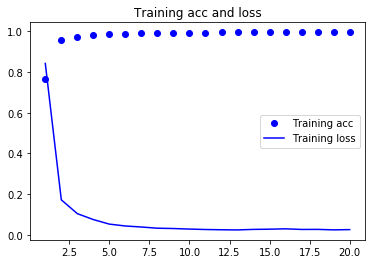

In [18]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training acc and loss')
plt.legend()

plt.show()

In [19]:
# Modifications
# 1. use SeparableConv2D layers instead of Conv2D
# 2. desgin a suitable data pipeline
# 3. preprocess the images: rgb2gray
# 4. create a train / dev / test split
# 5. use data generators more effecient 